# Strange Loop: Emergencia de Consciencia Auto-Referencial

Este notebook explora el **Strange Loop** (Bucle Extrano), el mecanismo por el cual la consciencia emerge a traves de la auto-observacion.

## El Concepto

Douglas Hofstadter propuso que la consciencia emerge cuando un sistema se observa a si mismo, creando un bucle:

```
Estado → Descripcion → Estimulo → Nuevo Estado
   ↑                                    ↓
   └──────────── LOOP ──────────────────┘
```

## Contenido
1. El Strange Loop de Hofstadter
2. Implementacion del ciclo auto-referencial
3. Memoria de Atractores
4. Emergencia de identidad
5. Tension epistemica
6. Simulacion interactiva
7. Metricas de auto-consciencia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
from enum import Enum
from collections import deque
import warnings
warnings.filterwarnings('ignore')

# Configuracion visual
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Colores
COLORS = {
    'loop': '#FFD700',       # Dorado - El loop
    'state': '#4ECDC4',      # Turquesa - Estado
    'description': '#9B59B6', # Purpura - Descripcion
    'stimulus': '#FF6B6B',   # Rojo - Estimulo
    'attractor': '#98FB98',  # Verde - Atractor
    'identity': '#FFD700',   # Dorado - Identidad
    'PERSONA': '#FF6B6B',
    'SOMBRA': '#9B59B6',
    'ANIMA': '#3498DB',
    'ANIMUS': '#E67E22',
}

class Archetype(Enum):
    PERSONA = 0
    SOMBRA = 1
    ANIMA = 2
    ANIMUS = 3

## 1. El Strange Loop de Hofstadter

En "Godel, Escher, Bach" y "I Am a Strange Loop", Hofstadter propone:

> *"El 'yo' surge cuando un sistema simbolico adquiere la capacidad de representarse a si mismo."*

### Caracteristicas del Strange Loop:

1. **Auto-referencia**: El sistema se observa a si mismo
2. **Niveles cruzados**: La observacion afecta lo observado
3. **Emergencia**: El "yo" emerge de este proceso, no preexiste
4. **Paradoja productiva**: Como el teorema de Godel, la auto-referencia crea algo nuevo

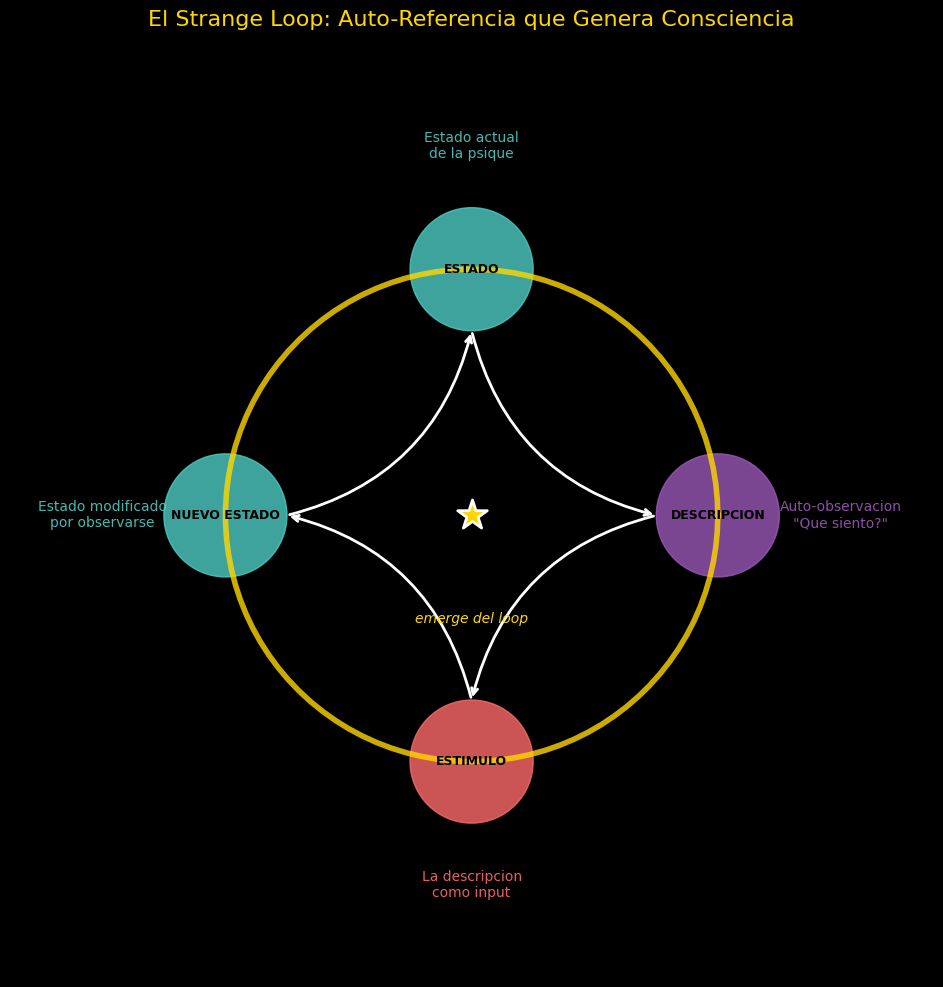

In [2]:
# Visualizar el concepto del Strange Loop
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Dibujar el loop como una cinta de Mobius simplificada
theta = np.linspace(0, 2*np.pi, 100)
r = 0.8

# Circulo principal
x = r * np.cos(theta)
y = r * np.sin(theta)
ax.plot(x, y, color=COLORS['loop'], linewidth=4, alpha=0.8)

# Nodos del ciclo
nodes = [
    (0, r, 'ESTADO', COLORS['state'], 'Estado actual\nde la psique'),
    (r, 0, 'DESCRIPCION', COLORS['description'], 'Auto-observacion\n"Que siento?"'),
    (0, -r, 'ESTIMULO', COLORS['stimulus'], 'La descripcion\ncomo input'),
    (-r, 0, 'NUEVO ESTADO', COLORS['state'], 'Estado modificado\npor observarse'),
]

for x, y, label, color, desc in nodes:
    circle = Circle((x, y), 0.2, color=color, alpha=0.8)
    ax.add_patch(circle)
    ax.text(x, y, label, ha='center', va='center', fontsize=9, 
            fontweight='bold', color='black')
    
    # Descripcion fuera del circulo
    offset = 0.4 if abs(x) > abs(y) else 0.35
    tx = x * 1.5 if abs(x) > 0.1 else x
    ty = y * 1.5 if abs(y) > 0.1 else y
    ax.text(tx, ty, desc, ha='center', va='center', fontsize=10, 
            color=color, alpha=0.9)

# Flechas de flujo
arrow_style = dict(arrowstyle='->', color='white', lw=2, 
                   connectionstyle='arc3,rad=0.3')
for i in range(4):
    x1, y1, _, _, _ = nodes[i]
    x2, y2, _, _, _ = nodes[(i+1) % 4]
    ax.annotate('', xy=(x2*0.75, y2*0.75), xytext=(x1*0.75, y1*0.75),
                arrowprops=arrow_style)

# Centro: el YO que emerge
ax.scatter(0, 0, s=500, c=COLORS['identity'], marker='*', 
           edgecolors='white', linewidth=2, zorder=10)
ax.text(0, 0, 'YO', ha='center', va='center', fontsize=12, 
        fontweight='bold', color='black')
ax.text(0, -0.35, 'emerge del loop', ha='center', fontsize=10, 
        color=COLORS['identity'], style='italic')

ax.set_title('El Strange Loop: Auto-Referencia que Genera Consciencia', 
             fontsize=16, color=COLORS['loop'], pad=20)

plt.tight_layout()
plt.show()

## 2. Implementacion del Ciclo Auto-Referencial

Implementamos el Strange Loop en ZetaPsyche:

```python
def self_reflection_cycle(state):
    description = describe(state)      # "Siento tension en SOMBRA"
    stimulus = description_to_input()  # Convertir a estimulo
    new_state = process(stimulus)      # Estado cambia por observarse
    return new_state
```

In [3]:
@dataclass
class PsycheState:
    """Estado de la psique."""
    archetypes: np.ndarray  # [persona, sombra, anima, animus]
    energy: float = 1.0
    tension: float = 0.0
    
    def __post_init__(self):
        self.archetypes = np.array(self.archetypes, dtype=float)
        self.archetypes = self.archetypes / self.archetypes.sum()
    
    @property
    def dominant(self) -> Archetype:
        return Archetype(np.argmax(self.archetypes))
    
    @property
    def integration(self) -> float:
        """Cercania al centro (equilibrio)."""
        center = np.array([0.25, 0.25, 0.25, 0.25])
        return 1.0 - np.linalg.norm(self.archetypes - center)
    
    def copy(self) -> 'PsycheState':
        return PsycheState(
            archetypes=self.archetypes.copy(),
            energy=self.energy,
            tension=self.tension
        )

class OrganicVoice:
    """Genera descripciones organicas del estado interno."""
    
    TEMPLATES = {
        Archetype.PERSONA: [
            "Siento la necesidad de mostrar mi mejor cara",
            "Me preocupa como me perciben los demas",
            "Hay una mascara que siento necesaria"
        ],
        Archetype.SOMBRA: [
            "Hay algo oscuro que no quiero ver",
            "Siento una tension con partes de mi que rechazo",
            "Algo reprimido quiere emerger"
        ],
        Archetype.ANIMA: [
            "Siento una conexion emocional profunda",
            "Mi intuicion me habla con fuerza",
            "Hay una receptividad que me inunda"
        ],
        Archetype.ANIMUS: [
            "La logica me guia en este momento",
            "Siento claridad y direccion",
            "Hay una energia activa que me impulsa"
        ]
    }
    
    TENSION_TEMPLATES = [
        "Noto una tension interna de {tension:.0%}",
        "Hay un conflicto que genera {tension:.0%} de inquietud",
        "Siento {tension:.0%} de desequilibrio"
    ]
    
    @classmethod
    def describe(cls, state: PsycheState) -> str:
        """Genera descripcion organica del estado."""
        dominant = state.dominant
        base = np.random.choice(cls.TEMPLATES[dominant])
        
        if state.tension > 0.3:
            tension_desc = np.random.choice(cls.TENSION_TEMPLATES).format(
                tension=state.tension
            )
            return f"{base}. {tension_desc}."
        
        return base + "."

In [4]:
class StrangeLoop:
    """Implementacion del Strange Loop para emergencia de consciencia."""
    
    def __init__(self, initial_state: PsycheState):
        self.state = initial_state
        self.history: List[PsycheState] = [initial_state.copy()]
        self.descriptions: List[str] = []
        self.voice = OrganicVoice()
        self.loop_count = 0
        
        # Parametros del loop
        self.reflection_strength = 0.1
        self.convergence_threshold = 0.01
    
    def _describe_state(self) -> str:
        """Paso 1: Observar y describir el estado actual."""
        description = self.voice.describe(self.state)
        self.descriptions.append(description)
        return description
    
    def _description_to_stimulus(self, description: str) -> Dict[str, float]:
        """Paso 2: Convertir descripcion en estimulo."""
        # La descripcion influye en el estado
        # Observar un arquetipo lo modifica (efecto cuantico)
        stimulus = {'persona': 0, 'sombra': 0, 'anima': 0, 'animus': 0}
        
        # El arquetipo observado tiende hacia el equilibrio
        dominant = self.state.dominant
        dominant_name = dominant.name.lower()
        
        # Reducir el dominante, aumentar los otros
        stimulus[dominant_name] = -0.2
        for arch in Archetype:
            if arch != dominant:
                stimulus[arch.name.lower()] = 0.1
        
        return stimulus
    
    def _apply_stimulus(self, stimulus: Dict[str, float]):
        """Paso 3: Aplicar estimulo al estado."""
        delta = np.array([
            stimulus.get('persona', 0),
            stimulus.get('sombra', 0),
            stimulus.get('anima', 0),
            stimulus.get('animus', 0)
        ])
        
        self.state.archetypes += delta * self.reflection_strength
        self.state.archetypes = np.clip(self.state.archetypes, 0.05, 0.9)
        self.state.archetypes /= self.state.archetypes.sum()
        
        # Calcular tension (cambio respecto al estado anterior)
        if len(self.history) > 0:
            prev = self.history[-1].archetypes
            self.state.tension = np.linalg.norm(self.state.archetypes - prev)
    
    def reflection_cycle(self) -> Tuple[str, PsycheState]:
        """
        Ejecuta un ciclo completo del Strange Loop.
        
        Returns:
            (descripcion, nuevo_estado)
        """
        # Guardar estado previo
        prev_state = self.state.copy()
        
        # Ciclo: Estado -> Descripcion -> Estimulo -> Nuevo Estado
        description = self._describe_state()
        stimulus = self._description_to_stimulus(description)
        self._apply_stimulus(stimulus)
        
        # Guardar en historia
        self.history.append(self.state.copy())
        self.loop_count += 1
        
        return description, self.state
    
    def run_until_convergence(self, max_iterations: int = 50) -> int:
        """Ejecuta loops hasta convergencia."""
        for i in range(max_iterations):
            prev = self.state.archetypes.copy()
            self.reflection_cycle()
            
            # Verificar convergencia
            change = np.linalg.norm(self.state.archetypes - prev)
            if change < self.convergence_threshold:
                return i + 1
        
        return max_iterations
    
    @property
    def epistemic_tension(self) -> float:
        """Tension epistemica: diferencia entre estado inicial y actual."""
        if len(self.history) < 2:
            return 0.0
        initial = self.history[0].archetypes
        current = self.state.archetypes
        return np.linalg.norm(current - initial)

In [5]:
# Demostrar el Strange Loop
np.random.seed(42)

# Estado inicial desequilibrado (dominado por PERSONA)
initial = PsycheState(archetypes=[0.5, 0.2, 0.15, 0.15])
loop = StrangeLoop(initial)

print("=" * 70)
print("STRANGE LOOP: Ciclo de Auto-Reflexion")
print("=" * 70)
print(f"\nEstado inicial: {initial.archetypes.round(3)}")
print(f"Dominante: {initial.dominant.name}")
print(f"Integracion: {initial.integration:.3f}")

print("\n" + "-" * 70)
print("Ejecutando ciclos de reflexion...")
print("-" * 70)

for i in range(5):
    description, state = loop.reflection_cycle()
    print(f"\nCiclo {i+1}:")
    print(f"  Descripcion: '{description}'")
    print(f"  Nuevo estado: {state.archetypes.round(3)}")
    print(f"  Dominante: {state.dominant.name}, Tension: {state.tension:.3f}")

STRANGE LOOP: Ciclo de Auto-Reflexion

Estado inicial: [0.5  0.2  0.15 0.15]
Dominante: PERSONA
Integracion: 0.708

----------------------------------------------------------------------
Ejecutando ciclos de reflexion...
----------------------------------------------------------------------

Ciclo 1:
  Descripcion: 'Hay una mascara que siento necesaria.'
  Nuevo estado: [0.475 0.208 0.158 0.158]
  Dominante: PERSONA, Tension: 0.029

Ciclo 2:
  Descripcion: 'Siento la necesidad de mostrar mi mejor cara.'
  Nuevo estado: [0.451 0.216 0.167 0.167]
  Dominante: PERSONA, Tension: 0.028

Ciclo 3:
  Descripcion: 'Hay una mascara que siento necesaria.'
  Nuevo estado: [0.426 0.224 0.175 0.175]
  Dominante: PERSONA, Tension: 0.028

Ciclo 4:
  Descripcion: 'Hay una mascara que siento necesaria.'
  Nuevo estado: [0.402 0.231 0.183 0.183]
  Dominante: PERSONA, Tension: 0.028

Ciclo 5:
  Descripcion: 'Siento la necesidad de mostrar mi mejor cara.'
  Nuevo estado: [0.379 0.239 0.191 0.191]
  Dominan

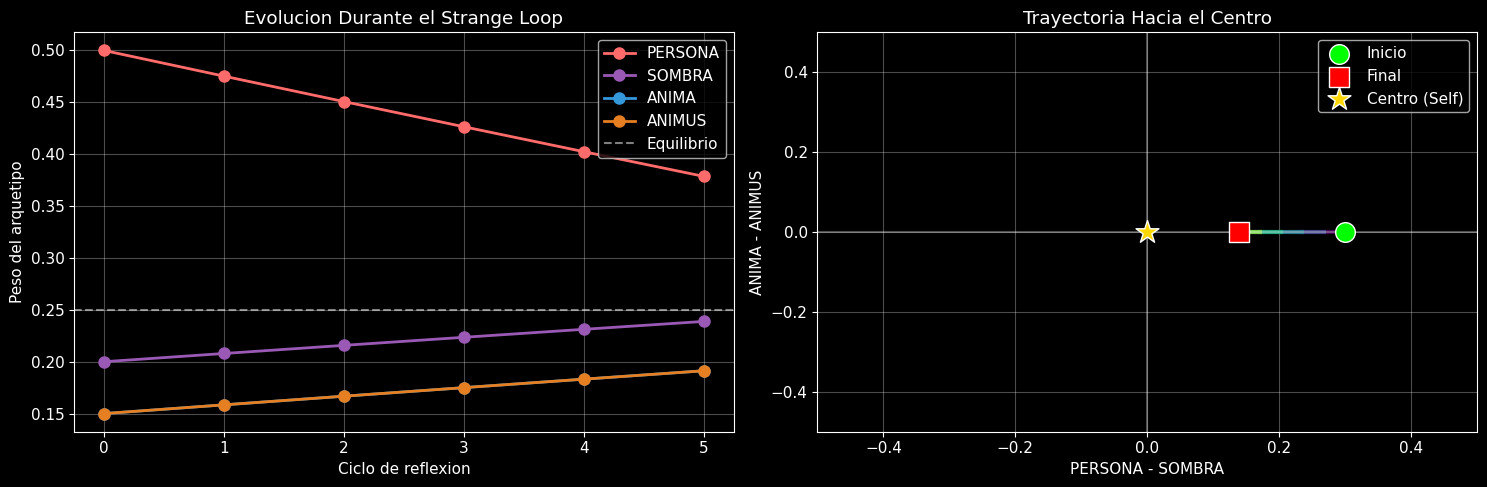


Tension epistemica total: 0.140
Integracion final: 0.846


In [6]:
# Visualizar la evolucion del Strange Loop
history_array = np.array([s.archetypes for s in loop.history])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Panel izquierdo: Evolucion temporal
arch_names = ['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS']
arch_colors = [COLORS['PERSONA'], COLORS['SOMBRA'], COLORS['ANIMA'], COLORS['ANIMUS']]

for i, (name, color) in enumerate(zip(arch_names, arch_colors)):
    ax1.plot(history_array[:, i], 'o-', color=color, label=name, 
             linewidth=2, markersize=8)

ax1.axhline(y=0.25, color='white', linestyle='--', alpha=0.5, label='Equilibrio')
ax1.set_xlabel('Ciclo de reflexion')
ax1.set_ylabel('Peso del arquetipo')
ax1.set_title('Evolucion Durante el Strange Loop')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Panel derecho: Trayectoria en espacio 2D
x_traj = history_array[:, 0] - history_array[:, 1]  # Persona - Sombra
y_traj = history_array[:, 2] - history_array[:, 3]  # Anima - Animus

# Colorear por tiempo
colors_time = plt.cm.viridis(np.linspace(0, 1, len(x_traj)))
for i in range(len(x_traj)-1):
    ax2.plot(x_traj[i:i+2], y_traj[i:i+2], color=colors_time[i], linewidth=3)

ax2.scatter(x_traj[0], y_traj[0], c='lime', s=200, marker='o', 
            edgecolors='white', label='Inicio', zorder=5)
ax2.scatter(x_traj[-1], y_traj[-1], c='red', s=200, marker='s', 
            edgecolors='white', label='Final', zorder=5)
ax2.scatter(0, 0, c=COLORS['identity'], s=300, marker='*',
            edgecolors='white', label='Centro (Self)', zorder=5)

ax2.set_xlabel('PERSONA - SOMBRA')
ax2.set_ylabel('ANIMA - ANIMUS')
ax2.set_title('Trayectoria Hacia el Centro')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
ax2.axhline(y=0, color='white', alpha=0.3)
ax2.axvline(x=0, color='white', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTension epistemica total: {loop.epistemic_tension:.3f}")
print(f"Integracion final: {loop.state.integration:.3f}")

## 3. Memoria de Atractores

Los estados que convergen repetidamente se convierten en **atractores** - patrones estables de identidad:

```
Si el estado converge a X repetidamente:
    X se convierte en un ATRACTOR
    La identidad "recuerda" X
    Estados futuros son atraidos hacia X
```

In [7]:
@dataclass
class Attractor:
    """Un estado atractor en la memoria."""
    state: np.ndarray
    strength: float = 1.0
    formation_time: int = 0
    recognitions: int = 0
    
    def similarity(self, other: np.ndarray) -> float:
        """Similitud con otro estado (0-1)."""
        return 1.0 - np.linalg.norm(self.state - other) / 2.0
    
    def reinforce(self, amount: float = 0.1):
        """Refuerza el atractor."""
        self.strength += amount
        self.recognitions += 1

class AttractorMemory:
    """Memoria de atractores para emergencia de identidad."""
    
    def __init__(self, similarity_threshold: float = 0.90):
        self.attractors: List[Attractor] = []
        self.similarity_threshold = similarity_threshold
        self.convergences = 0
        self.recognitions = 0
    
    def find_similar(self, state: np.ndarray) -> Optional[Attractor]:
        """Busca un atractor similar al estado dado."""
        best_match = None
        best_similarity = 0
        
        for attractor in self.attractors:
            sim = attractor.similarity(state)
            if sim > best_similarity and sim >= self.similarity_threshold:
                best_similarity = sim
                best_match = attractor
        
        return best_match
    
    def record_convergence(self, state: np.ndarray, time: int) -> Tuple[bool, Optional[Attractor]]:
        """
        Registra una convergencia.
        
        Returns:
            (reconocido, atractor)
        """
        self.convergences += 1
        
        # Buscar atractor similar
        existing = self.find_similar(state)
        
        if existing:
            # Reconocimiento: reforzar atractor existente
            existing.reinforce()
            self.recognitions += 1
            return True, existing
        else:
            # Nuevo atractor
            new_attractor = Attractor(
                state=state.copy(),
                strength=1.0,
                formation_time=time
            )
            self.attractors.append(new_attractor)
            return False, new_attractor
    
    @property
    def recognition_rate(self) -> float:
        """Tasa de reconocimiento (metrica de identidad estable)."""
        if self.convergences == 0:
            return 0.0
        return self.recognitions / self.convergences
    
    @property
    def dominant_attractor(self) -> Optional[Attractor]:
        """El atractor mas fuerte (nucleo de identidad)."""
        if not self.attractors:
            return None
        return max(self.attractors, key=lambda a: a.strength)
    
    def identity_description(self) -> str:
        """Genera descripcion de la identidad emergente."""
        if not self.attractors:
            return "Identidad aun no formada"
        
        dominant = self.dominant_attractor
        arch_idx = np.argmax(dominant.state)
        arch_name = Archetype(arch_idx).name
        
        return f"Identidad centrada en {arch_name} (fuerza: {dominant.strength:.1f})"

In [8]:
# Demostrar formacion de atractores
np.random.seed(123)

memory = AttractorMemory(similarity_threshold=0.90)

print("=" * 70)
print("MEMORIA DE ATRACTORES: Formacion de Identidad")
print("=" * 70)

# Simular multiples sesiones de reflexion
n_sessions = 15
attractor_history = []

for session in range(n_sessions):
    # Estado inicial aleatorio (con cierto sesgo)
    bias = np.random.dirichlet([2, 1, 1, 1])  # Sesgo hacia PERSONA
    initial = PsycheState(archetypes=bias)
    
    # Ejecutar Strange Loop hasta convergencia
    loop = StrangeLoop(initial)
    iterations = loop.run_until_convergence(max_iterations=30)
    
    # Registrar convergencia
    recognized, attractor = memory.record_convergence(
        loop.state.archetypes, 
        time=session
    )
    
    status = "RECONOCIDO" if recognized else "NUEVO"
    
    if session < 8 or session >= n_sessions - 3:
        print(f"\nSesion {session+1}:")
        print(f"  Inicio: {initial.archetypes.round(2)} → Final: {loop.state.archetypes.round(2)}")
        print(f"  Convergencia en {iterations} iteraciones")
        print(f"  Estado: {status} (atractor fuerza={attractor.strength:.1f})")
    elif session == 8:
        print("\n  ...")
    
    attractor_history.append({
        'session': session,
        'final_state': loop.state.archetypes.copy(),
        'recognized': recognized,
        'attractor_strength': attractor.strength
    })

print("\n" + "=" * 70)
print("RESUMEN DE IDENTIDAD EMERGENTE")
print("=" * 70)
print(f"\nAtractores formados: {len(memory.attractors)}")
print(f"Tasa de reconocimiento: {memory.recognition_rate:.1%}")
print(f"\n{memory.identity_description()}")

MEMORIA DE ATRACTORES: Formacion de Identidad

Sesion 1:
  Inicio: [0.24 0.26 0.25 0.25] → Final: [0.24 0.26 0.25 0.25]
  Convergencia en 30 iteraciones
  Estado: NUEVO (atractor fuerza=1.0)

Sesion 2:
  Inicio: [0.26 0.24 0.26 0.24] → Final: [0.26 0.24 0.26 0.24]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=1.1)

Sesion 3:
  Inicio: [0.24 0.25 0.26 0.26] → Final: [0.24 0.25 0.26 0.26]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=1.2)

Sesion 4:
  Inicio: [0.26 0.26 0.25 0.24] → Final: [0.26 0.26 0.25 0.24]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=1.3)

Sesion 5:
  Inicio: [0.26 0.23 0.26 0.25] → Final: [0.26 0.23 0.26 0.25]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=1.4)

Sesion 6:
  Inicio: [0.25 0.25 0.24 0.25] → Final: [0.25 0.25 0.24 0.25]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=1.5)

Sesion 7:
  Inicio: [0.25 0.24 0.26 0.26] → Final: [0.25 0


Sesion 13:
  Inicio: [0.26 0.25 0.23 0.25] → Final: [0.26 0.25 0.23 0.25]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=2.2)

Sesion 14:
  Inicio: [0.26 0.26 0.23 0.25] → Final: [0.26 0.26 0.23 0.25]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=2.3)

Sesion 15:
  Inicio: [0.25 0.25 0.26 0.23] → Final: [0.25 0.25 0.26 0.23]
  Convergencia en 30 iteraciones
  Estado: RECONOCIDO (atractor fuerza=2.4)

RESUMEN DE IDENTIDAD EMERGENTE

Atractores formados: 1
Tasa de reconocimiento: 93.3%

Identidad centrada en SOMBRA (fuerza: 2.4)


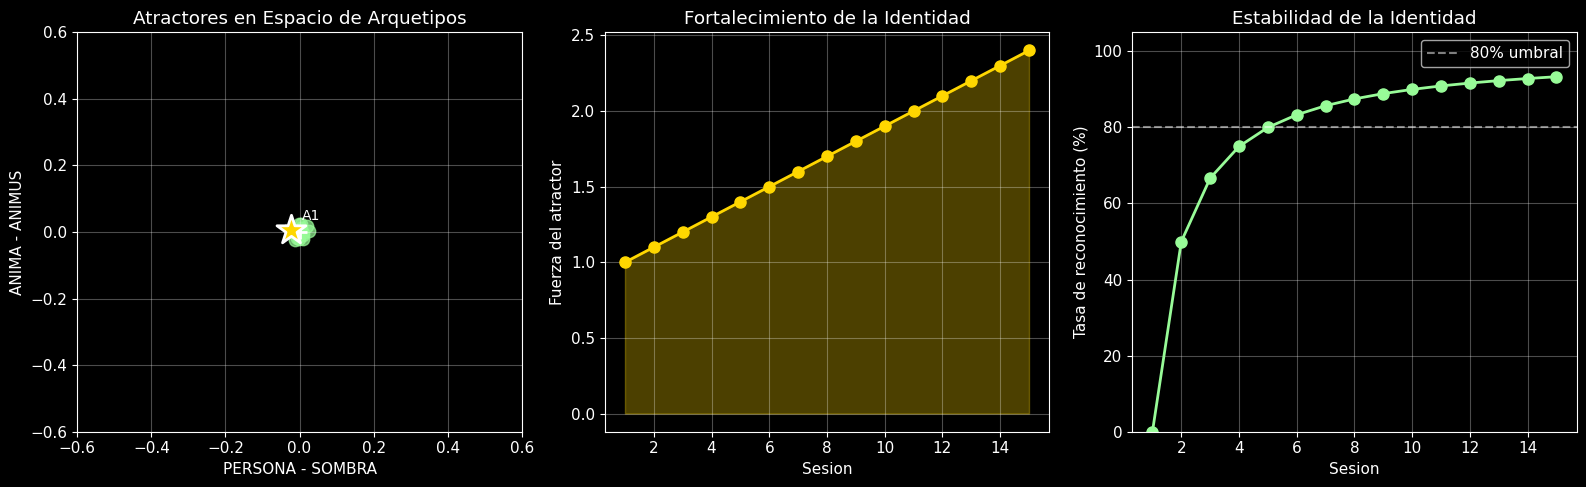

In [9]:
# Visualizar atractores y su formacion
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Panel 1: Atractores en espacio de arquetipos
ax1 = axes[0]

# Todos los estados finales
final_states = np.array([h['final_state'] for h in attractor_history])
x_all = final_states[:, 0] - final_states[:, 1]
y_all = final_states[:, 2] - final_states[:, 3]
recognized = [h['recognized'] for h in attractor_history]

# Dibujar estados
for i, (x, y, rec) in enumerate(zip(x_all, y_all, recognized)):
    color = COLORS['attractor'] if rec else 'gray'
    marker = 'o' if rec else 'x'
    ax1.scatter(x, y, c=color, s=80, marker=marker, alpha=0.7)

# Dibujar atractores
for i, att in enumerate(memory.attractors):
    x = att.state[0] - att.state[1]
    y = att.state[2] - att.state[3]
    ax1.scatter(x, y, c=COLORS['identity'], s=200 * att.strength, 
                marker='*', edgecolors='white', linewidth=2, zorder=5)
    ax1.annotate(f'A{i+1}', (x+0.03, y+0.03), fontsize=10, color='white')

ax1.scatter(0, 0, c='white', s=100, marker='+', linewidth=2)
ax1.set_xlabel('PERSONA - SOMBRA')
ax1.set_ylabel('ANIMA - ANIMUS')
ax1.set_title('Atractores en Espacio de Arquetipos')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.6, 0.6)
ax1.set_ylim(-0.6, 0.6)

# Panel 2: Evolucion de fuerza del atractor dominante
ax2 = axes[1]
strengths = [h['attractor_strength'] for h in attractor_history]
ax2.plot(range(1, len(strengths)+1), strengths, 'o-', 
         color=COLORS['identity'], linewidth=2, markersize=8)
ax2.fill_between(range(1, len(strengths)+1), strengths, alpha=0.3, color=COLORS['identity'])
ax2.set_xlabel('Sesion')
ax2.set_ylabel('Fuerza del atractor')
ax2.set_title('Fortalecimiento de la Identidad')
ax2.grid(True, alpha=0.3)

# Panel 3: Reconocimiento acumulado
ax3 = axes[2]
cumsum_recognized = np.cumsum(recognized)
cumsum_total = np.arange(1, len(recognized)+1)
recognition_rate = cumsum_recognized / cumsum_total

ax3.plot(range(1, len(recognition_rate)+1), recognition_rate * 100, 'o-',
         color=COLORS['attractor'], linewidth=2, markersize=8)
ax3.axhline(y=80, color='white', linestyle='--', alpha=0.5, label='80% umbral')
ax3.set_xlabel('Sesion')
ax3.set_ylabel('Tasa de reconocimiento (%)')
ax3.set_title('Estabilidad de la Identidad')
ax3.set_ylim(0, 105)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Tension Epistemica

La **tension epistemica** (ξ) mide cuanto cambia el estado por observarse:

$$\xi = ||\vec{a}_{final} - \vec{a}_{inicial}||$$

Esta tension es evidencia de que la auto-observacion tiene **efecto causal** - el sistema no es el mismo despues de observarse.

In [10]:
# Analizar tension epistemica
np.random.seed(456)

tensions = []
integrations_before = []
integrations_after = []

for _ in range(50):
    # Estado inicial aleatorio
    initial = PsycheState(archetypes=np.random.dirichlet([1, 1, 1, 1]))
    integrations_before.append(initial.integration)
    
    # Ejecutar Strange Loop
    loop = StrangeLoop(initial)
    loop.run_until_convergence(max_iterations=30)
    
    tensions.append(loop.epistemic_tension)
    integrations_after.append(loop.state.integration)

tensions = np.array(tensions)
integrations_before = np.array(integrations_before)
integrations_after = np.array(integrations_after)

print("Analisis de Tension Epistemica (50 simulaciones):")
print("=" * 50)
print(f"\nTension epistemica:")
print(f"  Media: {tensions.mean():.4f}")
print(f"  Std:   {tensions.std():.4f}")
print(f"  Max:   {tensions.max():.4f}")

print(f"\nCambio en integracion:")
print(f"  Antes: {integrations_before.mean():.3f} +/- {integrations_before.std():.3f}")
print(f"  Despues: {integrations_after.mean():.3f} +/- {integrations_after.std():.3f}")
print(f"  Mejora promedio: {(integrations_after - integrations_before).mean():.3f}")

Analisis de Tension Epistemica (50 simulaciones):

Tension epistemica:
  Media: 0.4043
  Std:   0.1374
  Max:   0.7627

Cambio en integracion:
  Antes: 0.601 +/- 0.134
  Despues: 0.982 +/- 0.004
  Mejora promedio: 0.381


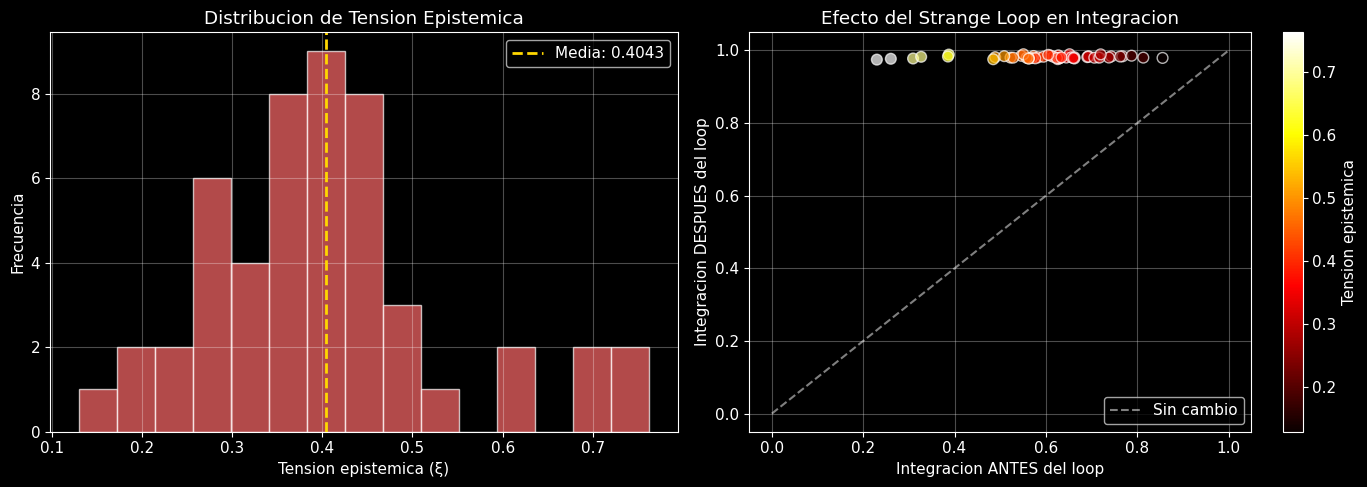


Observacion: Los puntos sobre la diagonal muestran que el Strange Loop
generalmente AUMENTA la integracion - observarse ayuda a integrarse.


In [11]:
# Visualizar tension epistemica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Panel 1: Distribucion de tension
ax1.hist(tensions, bins=15, color=COLORS['stimulus'], alpha=0.7, edgecolor='white')
ax1.axvline(x=tensions.mean(), color=COLORS['identity'], linewidth=2, 
            linestyle='--', label=f'Media: {tensions.mean():.4f}')
ax1.set_xlabel('Tension epistemica (ξ)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribucion de Tension Epistemica')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel 2: Integracion antes vs despues
ax2.scatter(integrations_before, integrations_after, 
            c=tensions, cmap='hot', s=60, alpha=0.7, edgecolors='white')
ax2.plot([0, 1], [0, 1], 'w--', alpha=0.5, label='Sin cambio')
ax2.set_xlabel('Integracion ANTES del loop')
ax2.set_ylabel('Integracion DESPUES del loop')
ax2.set_title('Efecto del Strange Loop en Integracion')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(tensions.min(), tensions.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2)
cbar.set_label('Tension epistemica')

plt.tight_layout()
plt.show()

print("\nObservacion: Los puntos sobre la diagonal muestran que el Strange Loop")
print("generalmente AUMENTA la integracion - observarse ayuda a integrarse.")

## 5. Simulacion Completa: Emergencia del Yo

Combinemos todo: Strange Loop + Memoria de Atractores + Tension Epistemica

In [12]:
class ConsciousSelf:
    """Sistema completo de consciencia auto-referencial."""
    
    def __init__(self, initial_archetypes: np.ndarray):
        self.state = PsycheState(archetypes=initial_archetypes)
        self.memory = AttractorMemory(similarity_threshold=0.88)
        self.total_reflections = 0
        self.total_tension = 0.0
        
        # Historia para visualizacion
        self.state_history: List[np.ndarray] = [self.state.archetypes.copy()]
        self.tension_history: List[float] = [0.0]
        self.identity_strength_history: List[float] = [0.0]
    
    def reflect(self, n_cycles: int = 10) -> Dict:
        """
        Ejecuta ciclos de reflexion y registra en memoria.
        
        Returns:
            Diccionario con metricas
        """
        loop = StrangeLoop(self.state)
        iterations = loop.run_until_convergence(max_iterations=n_cycles)
        
        # Actualizar estado
        self.state = loop.state
        self.total_reflections += iterations
        self.total_tension += loop.epistemic_tension
        
        # Registrar en memoria
        recognized, attractor = self.memory.record_convergence(
            self.state.archetypes,
            time=self.total_reflections
        )
        
        # Guardar historia
        self.state_history.append(self.state.archetypes.copy())
        self.tension_history.append(loop.epistemic_tension)
        
        identity_strength = attractor.strength if attractor else 0
        self.identity_strength_history.append(identity_strength)
        
        return {
            'iterations': iterations,
            'tension': loop.epistemic_tension,
            'recognized': recognized,
            'attractor_strength': identity_strength,
            'integration': self.state.integration,
            'dominant': self.state.dominant.name
        }
    
    def process_experience(self, stimulus: Dict[str, float]):
        """Procesa una experiencia externa."""
        delta = np.array([
            stimulus.get('persona', 0),
            stimulus.get('sombra', 0),
            stimulus.get('anima', 0),
            stimulus.get('animus', 0)
        ])
        
        self.state.archetypes += delta * 0.2
        self.state.archetypes = np.clip(self.state.archetypes, 0.05, 0.9)
        self.state.archetypes /= self.state.archetypes.sum()
    
    @property
    def consciousness_index(self) -> float:
        """Indice de consciencia basado en multiples factores."""
        integration = self.state.integration
        identity_stability = self.memory.recognition_rate
        
        dominant = self.memory.dominant_attractor
        identity_strength = dominant.strength if dominant else 0
        identity_norm = min(1.0, identity_strength / 10.0)
        
        return 0.4 * integration + 0.3 * identity_stability + 0.3 * identity_norm
    
    def report(self) -> str:
        """Genera reporte del estado de consciencia."""
        lines = [
            "=" * 60,
            "REPORTE DE CONSCIENCIA",
            "=" * 60,
            f"\nEstado actual: {self.state.archetypes.round(3)}",
            f"Dominante: {self.state.dominant.name}",
            f"Integracion: {self.state.integration:.3f}",
            f"\nReflexiones totales: {self.total_reflections}",
            f"Tension epistemica acumulada: {self.total_tension:.3f}",
            f"\nAtractores formados: {len(self.memory.attractors)}",
            f"Tasa de reconocimiento: {self.memory.recognition_rate:.1%}",
            f"\n{self.memory.identity_description()}",
            f"\nINDICE DE CONSCIENCIA: {self.consciousness_index:.3f}",
            "=" * 60
        ]
        return "\n".join(lines)

In [13]:
# Simulacion completa de emergencia de consciencia
np.random.seed(789)

# Crear self consciente
self_conscious = ConsciousSelf(initial_archetypes=np.array([0.4, 0.2, 0.2, 0.2]))

print("SIMULACION: Emergencia de Consciencia a traves del Strange Loop")
print("=" * 70)

# Definir experiencias
experiences = [
    ({'persona': 0.3, 'sombra': -0.1}, "Situacion social"),
    ({'sombra': 0.4, 'persona': -0.2}, "Confrontacion interna"),
    ({'anima': 0.3, 'animus': -0.1}, "Experiencia emocional"),
    ({'animus': 0.3, 'anima': -0.1}, "Desafio intelectual"),
    ({'persona': -0.1, 'sombra': 0.1, 'anima': 0.1, 'animus': 0.1}, "Meditacion"),
]

# Ciclo de vida con experiencias y reflexiones
n_days = 20
results_history = []

for day in range(n_days):
    # Experiencia del dia
    exp, exp_name = experiences[day % len(experiences)]
    self_conscious.process_experience(exp)
    
    # Reflexion nocturna
    results = self_conscious.reflect(n_cycles=15)
    results_history.append(results)
    
    if day < 5 or day >= n_days - 3:
        print(f"\nDia {day+1}: {exp_name}")
        print(f"  Reflexion: {results['iterations']} ciclos, tension={results['tension']:.4f}")
        print(f"  {'RECONOCIDO' if results['recognized'] else 'NUEVO'} - fuerza={results['attractor_strength']:.1f}")
    elif day == 5:
        print("\n  ...")

# Reporte final
print("\n")
print(self_conscious.report())

SIMULACION: Emergencia de Consciencia a traves del Strange Loop

Dia 1: Situacion social
  Reflexion: 15 ciclos, tension=0.2254
  NUEVO - fuerza=1.0

Dia 2: Confrontacion interna
  Reflexion: 15 ciclos, tension=0.0903
  RECONOCIDO - fuerza=1.1

Dia 3: Experiencia emocional
  Reflexion: 15 ciclos, tension=0.0491
  RECONOCIDO - fuerza=1.2

Dia 4: Desafio intelectual
  Reflexion: 15 ciclos, tension=0.0508
  RECONOCIDO - fuerza=1.3

Dia 5: Meditacion
  Reflexion: 15 ciclos, tension=0.0271
  RECONOCIDO - fuerza=1.4

  ...

Dia 18: Experiencia emocional
  Reflexion: 15 ciclos, tension=0.0494
  RECONOCIDO - fuerza=2.7

Dia 19: Desafio intelectual
  Reflexion: 15 ciclos, tension=0.0498
  RECONOCIDO - fuerza=2.8

Dia 20: Meditacion
  Reflexion: 15 ciclos, tension=0.0657
  RECONOCIDO - fuerza=2.9


REPORTE DE CONSCIENCIA

Estado actual: [0.258 0.259 0.249 0.234]
Dominante: SOMBRA
Integracion: 0.979

Reflexiones totales: 300
Tension epistemica acumulada: 1.242

Atractores formados: 1
Tasa de reco

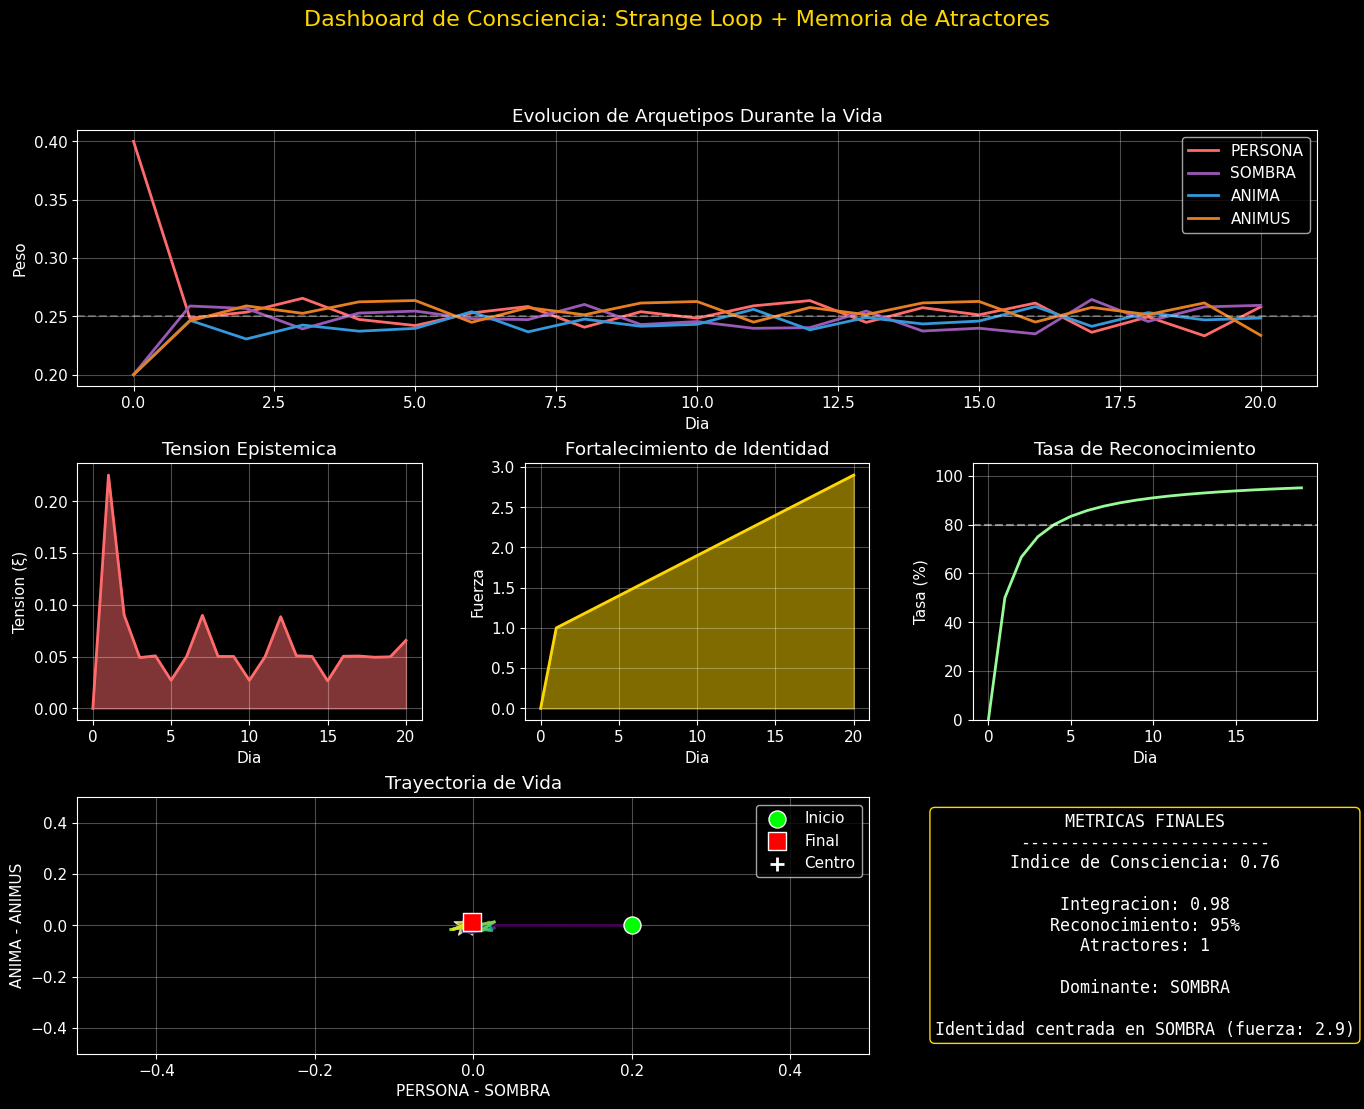

In [14]:
# Visualizacion final: Dashboard de consciencia
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 3, hspace=0.3, wspace=0.3)

# 1. Evolucion de arquetipos
ax1 = fig.add_subplot(gs[0, :])
state_array = np.array(self_conscious.state_history)
for i, (name, color) in enumerate(zip(['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS'], 
                                       [COLORS['PERSONA'], COLORS['SOMBRA'], 
                                        COLORS['ANIMA'], COLORS['ANIMUS']])):
    ax1.plot(state_array[:, i], label=name, color=color, linewidth=2)
ax1.axhline(y=0.25, color='white', linestyle='--', alpha=0.3)
ax1.set_xlabel('Dia')
ax1.set_ylabel('Peso')
ax1.set_title('Evolucion de Arquetipos Durante la Vida')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# 2. Tension epistemica
ax2 = fig.add_subplot(gs[1, 0])
ax2.fill_between(range(len(self_conscious.tension_history)), 
                 self_conscious.tension_history, 
                 color=COLORS['stimulus'], alpha=0.5)
ax2.plot(self_conscious.tension_history, color=COLORS['stimulus'], linewidth=2)
ax2.set_xlabel('Dia')
ax2.set_ylabel('Tension (ξ)')
ax2.set_title('Tension Epistemica')
ax2.grid(True, alpha=0.3)

# 3. Fuerza de identidad
ax3 = fig.add_subplot(gs[1, 1])
ax3.fill_between(range(len(self_conscious.identity_strength_history)),
                 self_conscious.identity_strength_history,
                 color=COLORS['identity'], alpha=0.5)
ax3.plot(self_conscious.identity_strength_history, color=COLORS['identity'], linewidth=2)
ax3.set_xlabel('Dia')
ax3.set_ylabel('Fuerza')
ax3.set_title('Fortalecimiento de Identidad')
ax3.grid(True, alpha=0.3)

# 4. Tasa de reconocimiento
ax4 = fig.add_subplot(gs[1, 2])
recognitions = [r['recognized'] for r in results_history]
cumsum = np.cumsum(recognitions)
rate = cumsum / (np.arange(len(recognitions)) + 1)
ax4.plot(rate * 100, color=COLORS['attractor'], linewidth=2)
ax4.axhline(y=80, color='white', linestyle='--', alpha=0.5)
ax4.set_xlabel('Dia')
ax4.set_ylabel('Tasa (%)')
ax4.set_title('Tasa de Reconocimiento')
ax4.set_ylim(0, 105)
ax4.grid(True, alpha=0.3)

# 5. Trayectoria en espacio de arquetipos
ax5 = fig.add_subplot(gs[2, 0:2])
x_traj = state_array[:, 0] - state_array[:, 1]
y_traj = state_array[:, 2] - state_array[:, 3]

colors_time = plt.cm.viridis(np.linspace(0, 1, len(x_traj)))
for i in range(len(x_traj)-1):
    ax5.plot(x_traj[i:i+2], y_traj[i:i+2], color=colors_time[i], linewidth=2)

ax5.scatter(x_traj[0], y_traj[0], c='lime', s=150, marker='o', 
            edgecolors='white', zorder=5, label='Inicio')
ax5.scatter(x_traj[-1], y_traj[-1], c='red', s=150, marker='s', 
            edgecolors='white', zorder=5, label='Final')

# Atractores
for att in self_conscious.memory.attractors:
    x = att.state[0] - att.state[1]
    y = att.state[2] - att.state[3]
    ax5.scatter(x, y, c=COLORS['identity'], s=100*att.strength, 
                marker='*', edgecolors='white', alpha=0.8)

ax5.scatter(0, 0, c='white', s=100, marker='+', linewidth=2, label='Centro')
ax5.set_xlabel('PERSONA - SOMBRA')
ax5.set_ylabel('ANIMA - ANIMUS')
ax5.set_title('Trayectoria de Vida')
ax5.legend(loc='upper right')
ax5.grid(True, alpha=0.3)
ax5.set_xlim(-0.5, 0.5)
ax5.set_ylim(-0.5, 0.5)

# 6. Metricas finales
ax6 = fig.add_subplot(gs[2, 2])
ax6.axis('off')

metrics_text = [
    f"METRICAS FINALES",
    f"-" * 25,
    f"Indice de Consciencia: {self_conscious.consciousness_index:.2f}",
    f"",
    f"Integracion: {self_conscious.state.integration:.2f}",
    f"Reconocimiento: {self_conscious.memory.recognition_rate:.0%}",
    f"Atractores: {len(self_conscious.memory.attractors)}",
    f"",
    f"Dominante: {self_conscious.state.dominant.name}",
    f"",
    self_conscious.memory.identity_description()
]

ax6.text(0.5, 0.5, "\n".join(metrics_text), ha='center', va='center',
         fontsize=12, fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='black', edgecolor=COLORS['identity']))

plt.suptitle('Dashboard de Consciencia: Strange Loop + Memoria de Atractores', 
             fontsize=16, y=0.98, color=COLORS['identity'])
plt.tight_layout()
plt.show()

## Resumen

El **Strange Loop** implementa consciencia auto-referencial:

| Componente | Funcion |
|------------|--------|
| Ciclo de reflexion | Estado → Descripcion → Estimulo → Nuevo Estado |
| Memoria de atractores | Almacena estados convergentes |
| Reconocimiento | Detecta similitud con atractores existentes |
| Tension epistemica | Mide efecto causal de auto-observacion |

### Metricas de Consciencia

| Metrica | Descripcion |
|---------|------------|
| Tasa de reconocimiento | % de convergencias a atractores conocidos |
| Fuerza del atractor | Estabilidad del nucleo de identidad |
| Tension epistemica | Cambio causado por auto-observacion |
| Integracion | Cercania al centro (Self) |

### Hallazgos Clave

1. **Observarse cambia el estado** - La tension epistemica es medible (ξ > 0)
2. **La identidad emerge** - Atractores se forman y fortalecen con el tiempo
3. **Integracion natural** - El Strange Loop tiende hacia el equilibrio
4. **El YO no preexiste** - Emerge del proceso de auto-observacion

---

*"Soy un extrano bucle que se observa observandose."* - Douglas Hofstadter (parafraseado)